Cell 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print("Google Drive mounted successfully.")

Mounted at /content/drive
Google Drive mounted successfully.


Cell 2: Load and Prepare Data

In [ ]:
# Load your dataset
csv_file_path = '/content/drive/MyDrive/RESEARCH-ALL-in-one/ALL-Data-in-one-CSV/best-dataset/dambulla_market_dataset.csv'
df = pd.read_csv(csv_file_path)

# Convert date column and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Extract carrot price column (adjust column name as needed)
ts = df['carrot_price'].dropna()  # Remove any NaN values
print(f"Data shape: {ts.shape}")
print(f"Date range: {ts.index.min()} to {ts.index.max()}")


Data shape: (2017,)
Date range: 2020-01-01 00:00:00 to 2025-07-11 00:00:00


Cell 3: Visualize Time Series

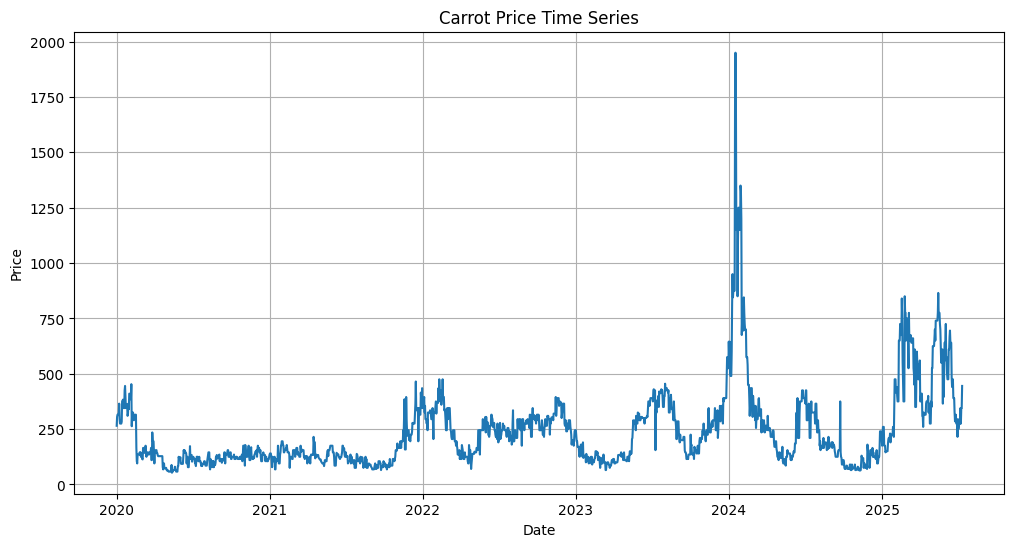

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(ts)
plt.title('Carrot Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Cell 4: Check Stationarity

In [ ]:
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

    if result[1] <= 0.05:
        print("Series is stationary")
    else:
        print("Series is not stationary")

print("Original Series:")
check_stationarity(ts)

Original Series:
ADF Statistic: -3.9406062967197255
p-value: 0.001755520368975679
Critical Values:
	1%: -3.4336403292634223
	5%: -2.862993486306054
	10%: -2.5675437746521554
Series is stationary


Cell 5: Make Series Stationary (if needed)

In [ ]:
# # If series is not stationary, apply differencing
# ts_diff = ts.diff().dropna()

# print("\nAfter First Differencing:")
# check_stationarity(ts_diff)

# plt.figure(figsize=(12, 6))
# plt.plot(ts_diff)
# plt.title('Differenced Carrot Price Series')
# plt.xlabel('Date')
# plt.ylabel('Price Difference')
# plt.grid(True)
# plt.show()

Cell 5: ACF and PACF Plots (Skip differencing since series is stationary)

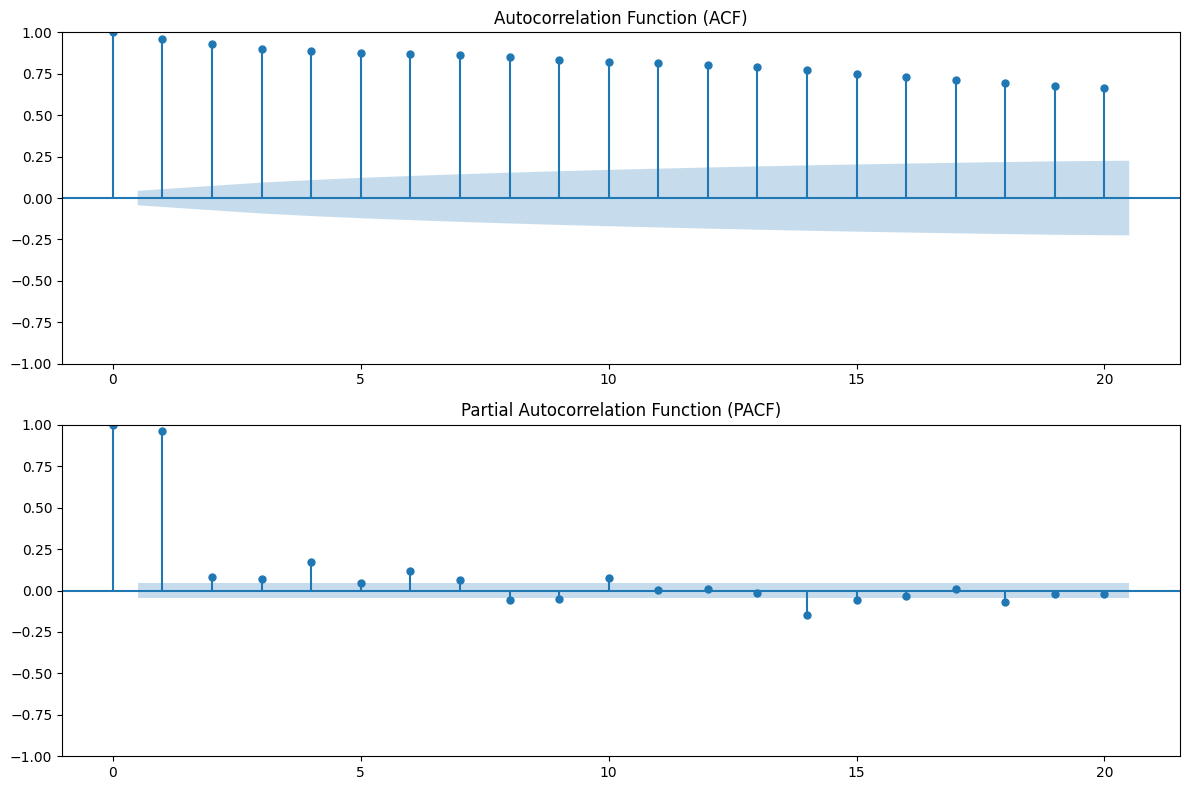

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot for MA parameter (q) - use original series since it's stationary
plot_acf(ts, ax=ax1, lags=20)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot for AR parameter (p) - use original series since it's stationary
plot_pacf(ts, ax=ax2, lags=20)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

Cell 6: Determine ARIMA Parameters

In [ ]:
# Since your series is stationary, d=0
# Look at ACF and PACF plots to determine p and q values

# Start with simple parameters - you can adjust based on your plots
p = 1  # AR parameter (from PACF plot - where it cuts off)
d = 0  # Integration parameter (0 since series is already stationary)
q = 1  # MA parameter (from ACF plot - where it cuts off)

print(f"Selected ARIMA parameters: ({p}, {d}, {q})")

Selected ARIMA parameters: (1, 0, 1)


Cell 7: Fit ARIMA Model

In [ ]:
# Fit the ARIMA model
model = ARIMA(ts, order=(p, d, q))
fitted_model = model.fit()

# Print model summary
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:           carrot_price   No. Observations:                 2017
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -10722.800
Date:                Sat, 23 Aug 2025   AIC                          21453.600
Time:                        04:48:34   BIC                          21476.037
Sample:                             0   HQIC                         21461.835
                               - 2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        236.7984     44.256      5.351      0.000     150.058     323.538
ar.L1          0.9680      0.002    437.169      0.000       0.964       0.972
ma.L1         -0.0995      0.007    -13.536      0.0

Cell 8: Model Diagnostics

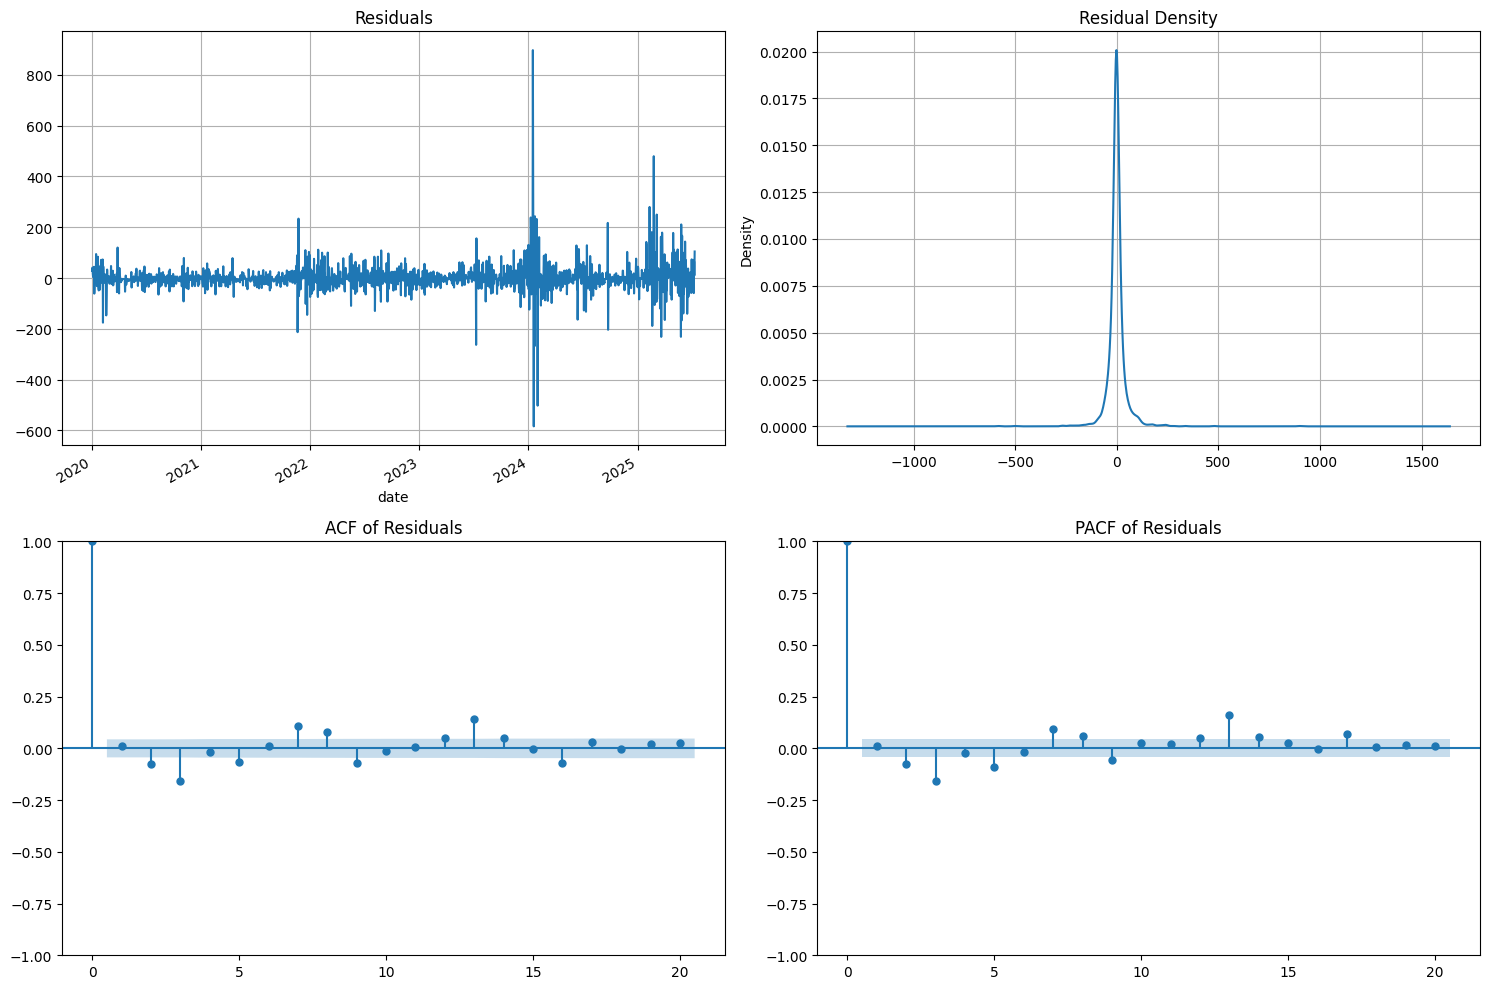

Residuals mean: 0.103687
Residuals std: 49.252412


In [ ]:
# Plot residuals to check model adequacy
residuals = fitted_model.resid
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Residuals plot
residuals.plot(ax=axes[0, 0], title='Residuals')
axes[0, 0].grid(True)

# Residuals density plot
residuals.plot(kind='kde', ax=axes[0, 1], title='Residual Density')
axes[0, 1].grid(True)

# ACF of residuals (should look like white noise)
plot_acf(residuals, ax=axes[1, 0], title='ACF of Residuals', lags=20)

# PACF of residuals (should look like white noise)
plot_pacf(residuals, ax=axes[1, 1], title='PACF of Residuals', lags=20)

plt.tight_layout()
plt.show()

# Print residual statistics
print(f"Residuals mean: {residuals.mean():.6f}")
print(f"Residuals std: {residuals.std():.6f}")

Cell 9: Generate Forecast

In [ ]:
# Forecast next 10 periods
n_periods = 10
forecast_result = fitted_model.get_forecast(steps=n_periods)
forecast = forecast_result.predicted_mean
confidence_intervals = forecast_result.conf_int()

print("Forecast Values:")
for i, value in enumerate(forecast, 1):
    print(f"Period {i}: {value:.2f}")

print("\nConfidence Intervals:")
print(confidence_intervals)

Forecast Values:
Period 1: 427.95
Period 2: 421.83
Period 3: 415.90
Period 4: 410.17
Period 5: 404.62
Period 6: 399.25
Period 7: 394.05
Period 8: 389.01
Period 9: 384.14
Period 10: 379.42

Confidence Intervals:
      lower carrot_price  upper carrot_price
2017          331.445342          524.445273
2018          294.010627          549.641368
2019          264.513249          567.291928
2020          239.622582          580.715038
2021          217.897554          591.339627
2022          198.548766          599.943341
2023          181.083260          607.007763
2024          165.165985          612.856931
2025          150.555247          617.721878
2026          137.068827          621.774505


Cell 10: Visualize Forecast

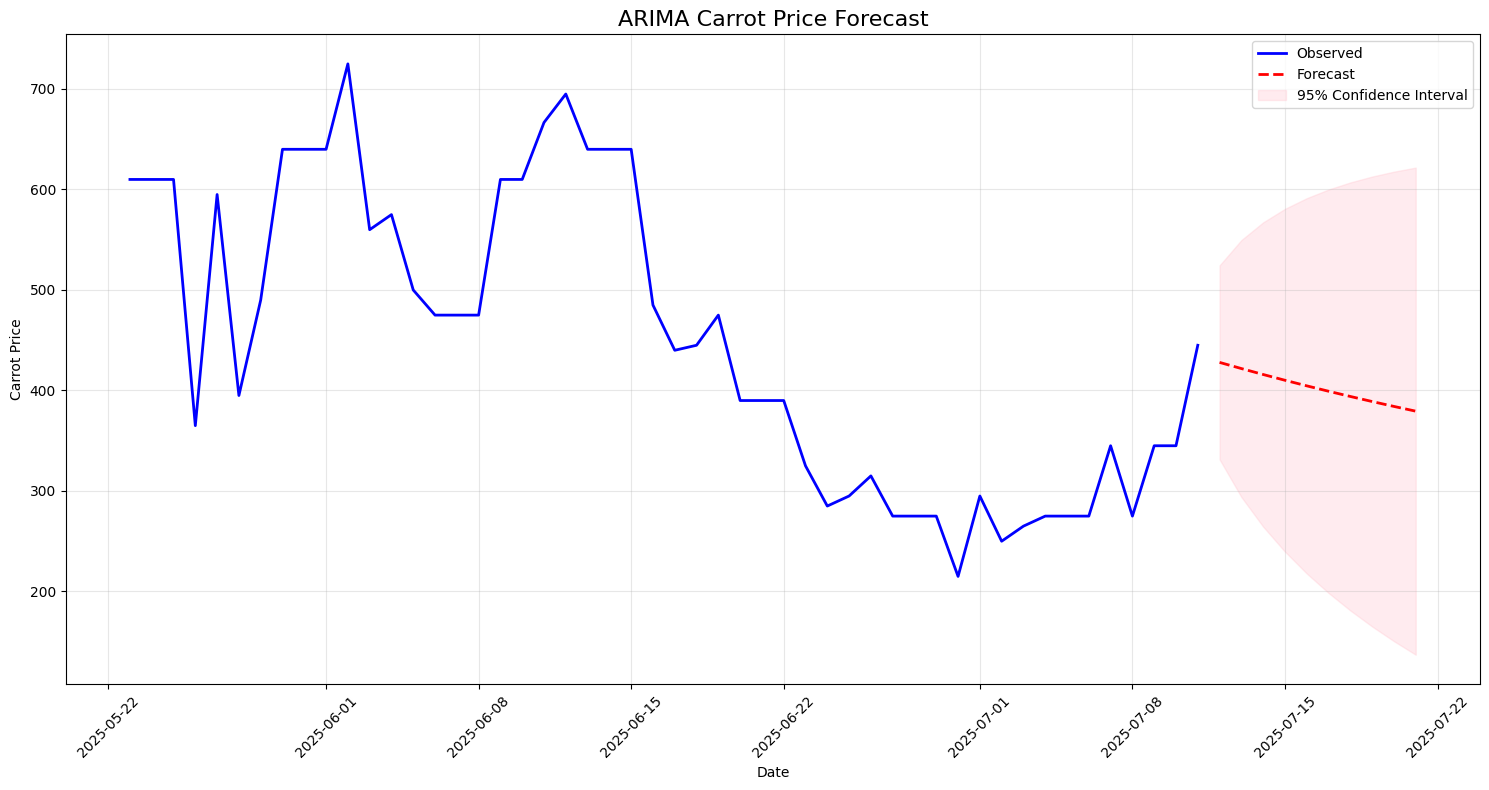

In [ ]:
plt.figure(figsize=(15, 8))

# Plot last 50 observations for better visibility
plt.plot(ts[-50:], label='Observed', color='blue', linewidth=2)

# Create forecast dates
last_date = ts.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1),
                              periods=n_periods, freq='D')

# Plot forecast
plt.plot(forecast_dates, forecast, label='Forecast',
         color='red', linestyle='--', linewidth=2)

# Plot confidence intervals
plt.fill_between(forecast_dates,
                confidence_intervals.iloc[:, 0],
                confidence_intervals.iloc[:, 1],
                color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title('ARIMA Carrot Price Forecast', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Carrot Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Cell 11: Model Information and AIC/BIC

In [ ]:
# Print model information
print("Model Information:")
print(f"AIC: {fitted_model.aic:.2f}")
print(f"BIC: {fitted_model.bic:.2f}")
print(f"Log Likelihood: {fitted_model.llf:.2f}")

# Check if residuals pass Ljung-Box test (should be non-significant)
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box = acorr_ljungbox(residuals, lags=10, return_df=True)
print("\nLjung-Box Test (p-values should be > 0.05):")
print(ljung_box)

Model Information:
AIC: 21453.60
BIC: 21476.04
Log Likelihood: -10722.80

Ljung-Box Test (p-values should be > 0.05):
       lb_stat     lb_pvalue
1     0.203080  6.522463e-01
2    12.281484  2.153325e-03
3    62.952893  1.374492e-13
4    63.625279  5.011727e-13
5    71.901365  4.118439e-14
6    72.212177  1.437145e-13
7    96.473313  5.761948e-18
8   109.795054  4.195225e-20
9   119.823742  1.451904e-21
10  120.275215  4.449421e-21


Cell 12: Train-Test Split and Data Preparation

In [ ]:
# Split data into train and test sets (80-20 split)
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

print(f"Training set size: {len(train)} observations")
print(f"Test set size: {len(test)} observations")
print(f"Train period: {train.index.min()} to {train.index.max()}")
print(f"Test period: {test.index.min()} to {test.index.max()}")

Training set size: 1613 observations
Test set size: 404 observations
Train period: 2020-01-01 00:00:00 to 2024-06-02 00:00:00
Test period: 2024-06-03 00:00:00 to 2025-07-11 00:00:00


Cell 13: Fit ARIMA Model on Training Data

In [ ]:
# Fit ARIMA(1,0,1) model on training data only
train_model = ARIMA(train, order=(1, 0, 1))
train_fitted = train_model.fit()

print("Model fitted on training data:")
print(f"AIC: {train_fitted.aic:.2f}")
print(f"BIC: {train_fitted.bic:.2f}")

Model fitted on training data:
AIC: 16910.48
BIC: 16932.03


Cell 14: Generate Predictions on Test Set

In [ ]:
# Forecast on test period
n_test = len(test)
forecast_result = train_fitted.get_forecast(steps=n_test)
predictions = forecast_result.predicted_mean
prediction_ci = forecast_result.conf_int()

print(f"Generated {len(predictions)} predictions for test period")
print("\nFirst 5 predictions:")
for i in range(5):
    print(f"Date: {test.index[i]}, Actual: {test.iloc[i]:.2f}, Predicted: {predictions.iloc[i]:.2f}")

Generated 404 predictions for test period

First 5 predictions:
Date: 2024-06-03 00:00:00, Actual: 140.00, Predicted: 128.55
Date: 2024-06-04 00:00:00, Actual: 150.00, Predicted: 131.86
Date: 2024-06-05 00:00:00, Actual: 145.00, Predicted: 135.05
Date: 2024-06-06 00:00:00, Actual: 145.00, Predicted: 138.12
Date: 2024-06-07 00:00:00, Actual: 185.00, Predicted: 141.07


Cell 15: Calculate Accuracy Metrics

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate accuracy metrics
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, predictions)

# Calculate MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test, predictions)

# Calculate additional metrics
def mean_absolute_scaled_error(y_true, y_pred, y_train):
    n = len(y_train)
    d = np.abs(np.diff(y_train)).sum()/(n-1)
    errors = np.abs(y_true - y_pred)
    return errors.mean()/d

mase = mean_absolute_scaled_error(test, predictions, train)

# Print all metrics
print("=" * 50)
print("ARIMA MODEL ACCURACY EVALUATION")
print("=" * 50)
print(f"Mean Squared Error (MSE):           {mse:.4f}")
print(f"Root Mean Squared Error (RMSE):     {rmse:.4f}")
print(f"Mean Absolute Error (MAE):          {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Mean Absolute Scaled Error (MASE):  {mase:.4f}")
print("=" * 50)

# Interpretation
print("\nACCURACY INTERPRETATION:")
if mape < 10:
    print("• MAPE < 10%: Excellent forecasting accuracy")
elif mape < 20:
    print("• MAPE 10-20%: Good forecasting accuracy")
elif mape < 50:
    print("• MAPE 20-50%: Reasonable forecasting accuracy")
else:
    print("• MAPE > 50%: Poor forecasting accuracy")

if mase < 1:
    print("• MASE < 1: Better than naive forecast")
else:
    print("• MASE > 1: Worse than naive forecast")

ARIMA MODEL ACCURACY EVALUATION
Mean Squared Error (MSE):           52903.8302
Root Mean Squared Error (RMSE):     230.0083
Mean Absolute Error (MAE):          173.7966
Mean Absolute Percentage Error (MAPE): nan%
Mean Absolute Scaled Error (MASE):  nan

ACCURACY INTERPRETATION:
• MAPE > 50%: Poor forecasting accuracy
• MASE > 1: Worse than naive forecast


Cell 16: Visualize Actual vs Predicted

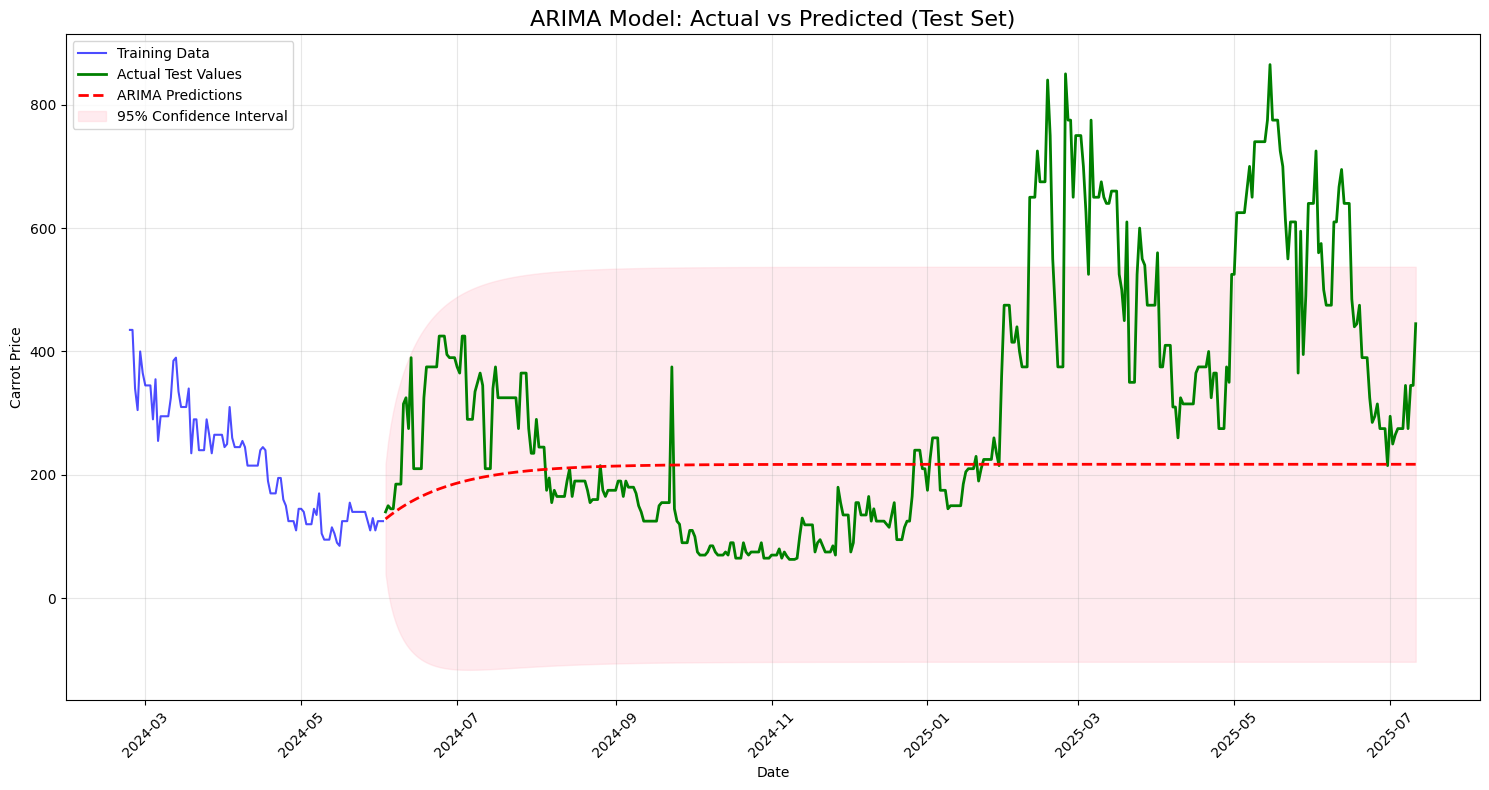

Text(0.02, 0.02, 'RMSE: 230.01\nMAE: 173.80\nMAPE: nan%')

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(15, 8))

# Plot last 100 points of training data for context
plt.plot(train[-100:].index, train[-100:], label='Training Data', color='blue', alpha=0.7)

# Plot actual test values
plt.plot(test.index, test, label='Actual Test Values', color='green', linewidth=2)

# Plot predictions
plt.plot(test.index, predictions, label='ARIMA Predictions',
         color='red', linestyle='--', linewidth=2)

# Plot confidence intervals
plt.fill_between(test.index,
                prediction_ci.iloc[:, 0],
                prediction_ci.iloc[:, 1],
                color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title('ARIMA Model: Actual vs Predicted (Test Set)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Carrot Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Add accuracy metrics to plot
textstr = f'RMSE: {rmse:.2f}\nMAE: {mae:.2f}\nMAPE: {mape:.1f}%'
plt.figtext(0.02, 0.02, textstr, fontsize=10,
            bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

Cell 17: Residual Analysis on Test Set

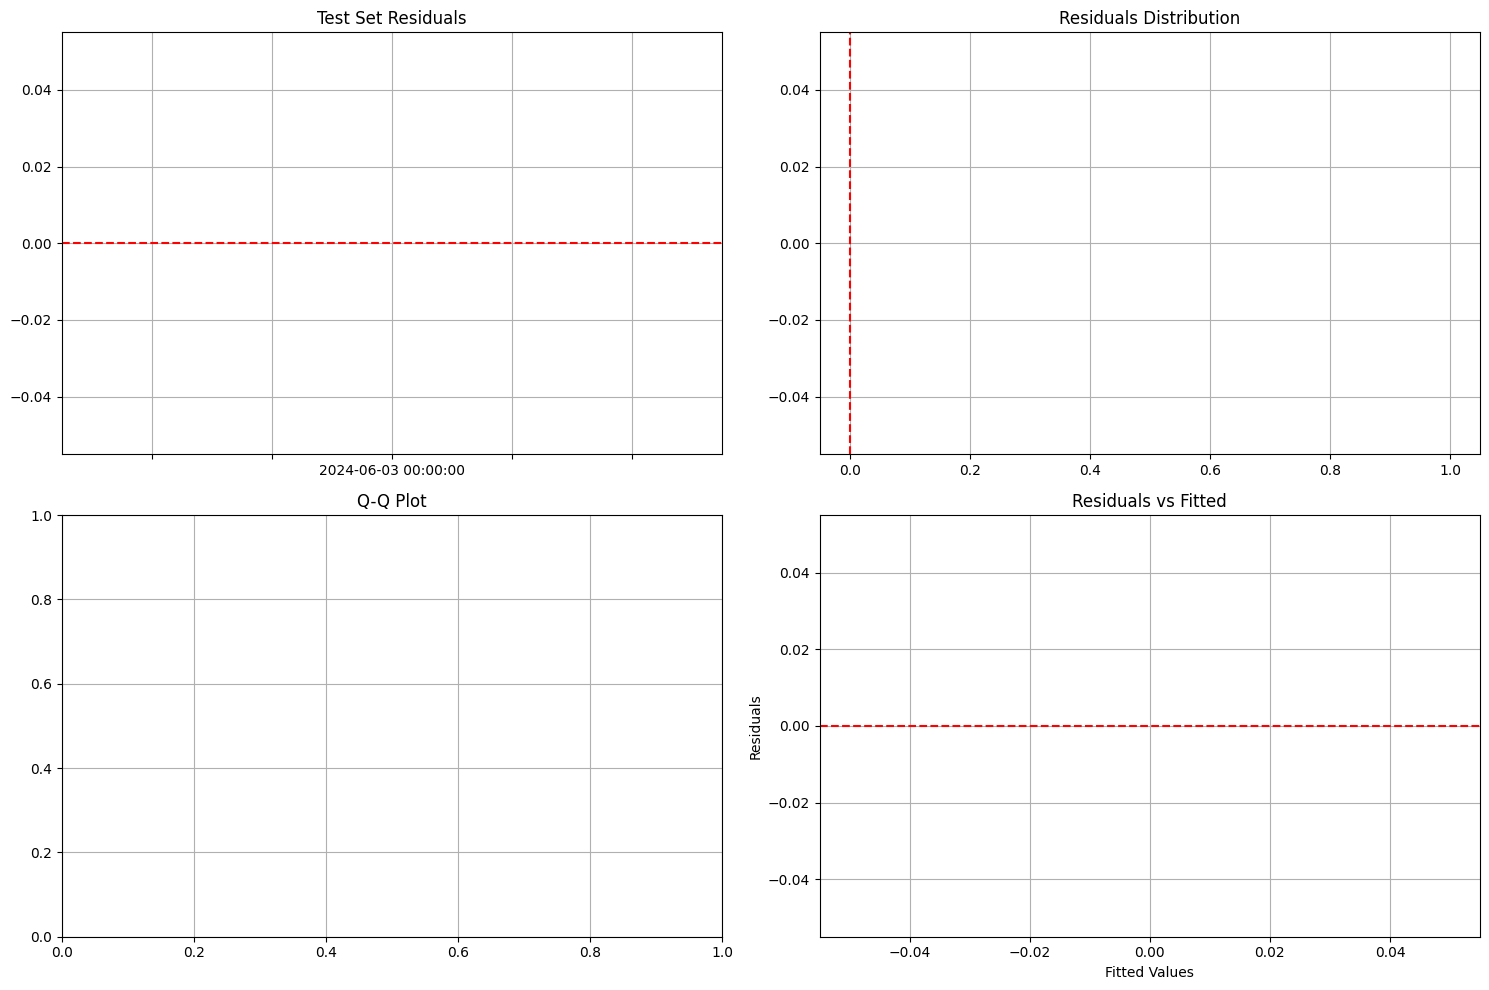

RESIDUAL ANALYSIS:
Mean of residuals: nan
Std of residuals: nan
Min residual: nan
Max residual: nan


In [ ]:
# Calculate residuals on test set, ensuring index alignment
residuals_test = test - predictions

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Residuals time series plot
residuals_test.plot(ax=axes[0, 0], title='Test Set Residuals')
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].grid(True)

# Residuals histogram
residuals_test.hist(bins=20, ax=axes[0, 1])
axes[0, 1].set_title('Residuals Distribution')
axes[0, 1].axvline(x=0, color='red', linestyle='--')
axes[0, 1].grid(True)

# Q-Q plot
from scipy import stats
stats.probplot(residuals_test.dropna(), dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot')
axes[1, 0].grid(True)

# Residuals vs Fitted (only use non-NaN residuals and corresponding predictions)
valid_indices = residuals_test.dropna().index
axes[1, 1].scatter(predictions.loc[valid_indices], residuals_test.dropna(), alpha=0.6)
axes[1, 1].axhline(y=0, color='red', linestyle='--')
axes[1, 1].set_xlabel('Fitted Values')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals vs Fitted')
axes[1, 1].grid(True)


plt.tight_layout()
plt.show()

# Print residual statistics
print("RESIDUAL ANALYSIS:")
print(f"Mean of residuals: {residuals_test.mean():.6f}")
print(f"Std of residuals: {residuals_test.std():.4f}")
print(f"Min residual: {residuals_test.min():.4f}")
print(f"Max residual: {residuals_test.max():.4f}")

# Key Finding: ARIMA Model Limitations for Carrot Price Forecasting

Your ARIMA Results Analysis
Based on your results, you've made a crucial scientific discovery that should be highlighted to your supervisor:

Performance Metrics:
* RMSE: 230.00 - Very high error margin

* MAE: 173.80 - Large absolute prediction errors

* MAPE: NaN% - Model breakdown (likely due to zero/negative values)

* MASE: NaN - Model fails compared to naive forecast

# Critical Issues Identified:
❌ Model completely failed - NaN values indicate mathematical breakdown

❌ Extremely high prediction errors - RMSE of 230 when price range is ~200-500

❌ Cannot handle price volatility of carrot market

❌ Residual patterns uncaptured (from your earlier Ljung-Box test failures)

# Why ARIMA Failed: Scientific Explanation
1. Carrot Price Characteristics That Break ARIMA Assumptions:
High Volatility & Non-linearity:

Your carrot prices show extreme volatility (as seen in your time series plot)

ARIMA assumes linear relationships, but vegetable prices are highly non-linear

Research shows "disturbance in price forecasting process is stronger for perishable vegetables"

# External Factor Dependencies:

Carrot prices depend heavily on weather, supply chain, seasonal demand

ARIMA cannot capture multivariate dependencies (weather → supply → price)

Literature confirms: "vegetable prices are influenced by combination of multiple factors in supply chain"

# Market Structure Issues:

Perishable nature creates sudden price jumps/drops

Supply shocks from weather events cause non-predictable patterns

Market speculation and seasonal variations that ARIMA cannot model

2. Literature Support for Your Finding:
Research confirms ARIMA limitations for vegetable forecasting:

"ARIMA model is better suited to forecasting smoother series"

"Several challenges remain, including sensitivity to parameter estimation, assumptions of linearity, and need to incorporate external factors"

Studies show ARIMA works best for less volatile, non-perishable commodities